<div style="color: #80cbc4; font-size: 34px"> Projet Long     Julia VS Python VS R</div>

<div style="color: #59698d; font-size: 18px">Audrey Fortuné M2BI </div>

<div class="alert alert-block alert-success">
    Run cells in R 4.0.4
</div>

Nous allons mesurer le temps d'exécuter du programme.


In [102]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
start_time <- Sys.time()
########### ~~~~~~~~~~~~~~~~~~~~~###########

## 1) Lire un fichier .pdb

Nous allons prendre comme fichier d'exemple, la structure disponible sur la Protein Data Bank '1RGB' qui est une phospholipase A2 de *Vipera ammodytes meridionali*.

Nous utilisons le module 'bio3d' 

In [2]:
# import des packages

install.packages("bio3d", dependencies = TRUE)
library(bio3d)


The downloaded binary packages are in
	/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmp3ZPzpk/downloaded_packages


In [3]:
# Read a PDB file from the RCSB online database
prot_file <- read.pdb("1RGB", verbose = FALSE) 

  Note: Accessing on-line PDB file


In [4]:
head(prot_file$atom) 

,type,eleno,elety,alt,resid,chain,resno,insert,x,y,z,o,b,segid,elesy,charge
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ATOM,1,N,NA,ASN,A,1,NA,3.401,54.835,28.926,1,14.39,NA,N,NA
2,ATOM,2,CA,NA,ASN,A,1,NA,4.682,55.345,28.346,1,17.06,NA,C,NA
3,ATOM,3,C,NA,ASN,A,1,NA,4.398,55.773,26.936,1,16.21,NA,C,NA
4,ATOM,4,O,NA,ASN,A,1,NA,3.362,55.420,26.362,1,13.89,NA,O,NA
5,ATOM,5,CB,NA,ASN,A,1,NA,5.748,54.251,28.296,1,16.61,NA,C,NA
6,ATOM,6,CG,NA,ASN,A,1,NA,5.339,53.077,27.410,1,18.56,NA,C,NA


In [5]:
prot_file


 Call:  read.pdb(file = "1RGB", verbose = FALSE)

   Total Models#: 1
     Total Atoms#: 3892,  XYZs#: 11676  Chains#: 4  (values: A B K L)

     Protein Atoms#: 3852  (residues/Calpha atoms#: 488)
     Nucleic acid Atoms#: 0  (residues/phosphate atoms#: 0)

     Non-protein/nucleic Atoms#: 40  (residues: 2)
     Non-protein/nucleic resid values: [ ELD (2) ]

   Protein sequence:
      NLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPK
      LAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSE
      QCNLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCN
      PKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTY...<cut>...SEQC

+ attr: atom, xyz, seqres, helix, sheet,
        calpha, remark, call

Protein Structure 1gh4.pdb with 1 models, 1 chains A , 123 residues, 1089 atoms

Affichons les coordonnées des carbones α (notés CA) des 10 premiers résidus:

In [8]:
# Sélection que des Carbones alphas
ca <- atom.select(prot_file, elety = "CA")
chain <- prot_file$atom[ca$atom, c("resno","resid","x","y","z")]
for (v in 1:10) {
    cat("Residue", chain$resno[v], "with name", chain$resid[v], "coordinates [", chain$x[v], chain$y[v], chain$z[v], "] \n")
}

Residue 1 with name ASN coordinates [ 4.682 55.345 28.346 ] 
Residue 2 with name LEU coordinates [ 5.148 56.953 25.006 ] 
Residue 3 with name PHE coordinates [ 4.657 53.617 23.371 ] 
Residue 4 with name GLN coordinates [ 1.52 52.812 25.326 ] 
Residue 5 with name PHE coordinates [ 0.559 56.349 24.578 ] 
Residue 6 with name ALA coordinates [ 1.554 56.075 20.967 ] 
Residue 7 with name LYS coordinates [ -0.772 53.147 20.427 ] 
Residue 8 with name MET coordinates [ -3.666 55.052 21.963 ] 
Residue 9 with name ILE coordinates [ -3.329 57.765 19.393 ] 
Residue 10 with name ASN coordinates [ -3.162 55.165 16.617 ] 


In [103]:
seq_prot <- function(file_name){
    # Reading a pdb file and extracting protein sequence
    text <- aa321(file_name$seqres) # pour changer le code à 3 lettres en code à 1 lettre
    text <- data.frame(text)
    for (aa in text){
        tmp <- paste0(aa, collapse = "")
    }
    return(tmp)
}

In [104]:
seq_prot(prot_file)

[1] "NLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSEQCNLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSEQCNLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSEQCNLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSEQC"

In [73]:
# structure secondaire (hélice, brin, turn)
sse <- print.sse(prot_file)


Call:
  read.pdb(file = "1RGB", verbose = FALSE)

Class:
  pdbsse

Helices:  24 
         1-13 (A)      18-22 (A)      40-55 (A)     90-108 (A)    114-118 (A)
         2-12 (B)      18-23 (B)      39-55 (B)      77-81 (B)     90-108 (B)
      109-113 (B)    114-118 (B)    121-127 (B)       1-13 (K)      17-22 (K)
        39-55 (K)     90-109 (K)    121-127 (K)       1-14 (L)      17-22 (L)
        39-55 (L)     90-109 (L)    114-118 (L)    121-127 (L)

Sheets:   6 
        76-78 (A)      81-83 (A)      75-76 (B)      83-84 (B)      75-77 (K)
        82-84 (K)

Turns:   0 

Output is provided in residue numbers



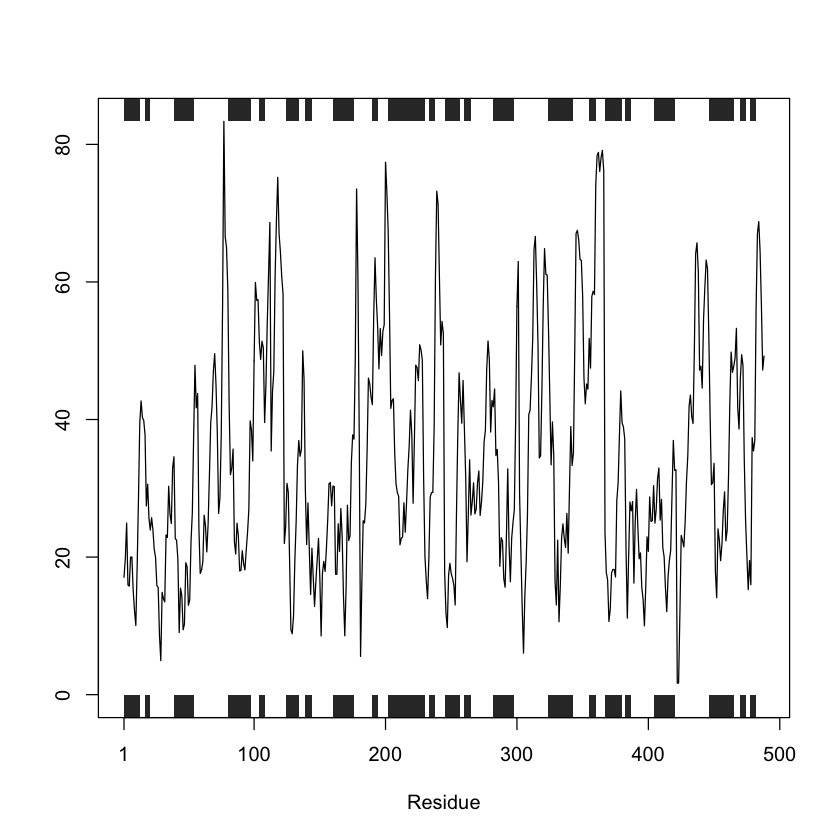

In [10]:
 # Select Calpha atoms
inds <- atom.select(prot_file, "calpha")
plot.bio3d(prot_file$atom$b[inds$atom], sse=prot_file, typ="l")

Warning message in nma.pdb(prot_file):
“Possible multi-chain structure or missing in-structure residue(s) present
  Fluctuations at neighboring positions may be affected.”


 Building Hessian...		Done in 0.221 seconds.
 Diagonalizing Hessian...	Done in 8.666 seconds.


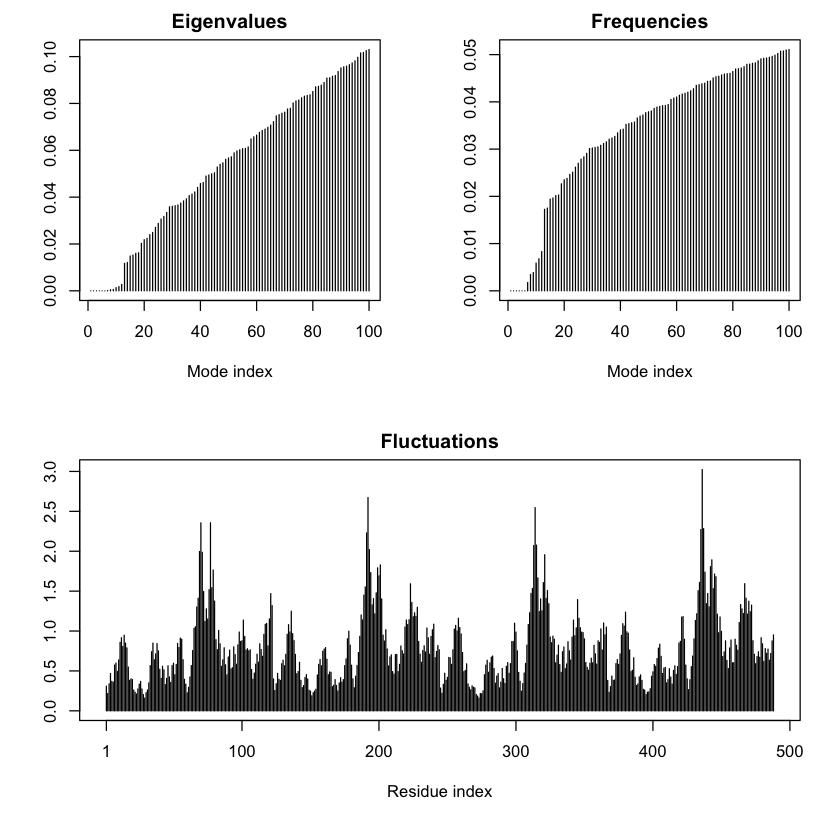

In [11]:
#a normal mode analysis (NMA) on our structure 
modes <- nma(prot_file) 
plot(modes)

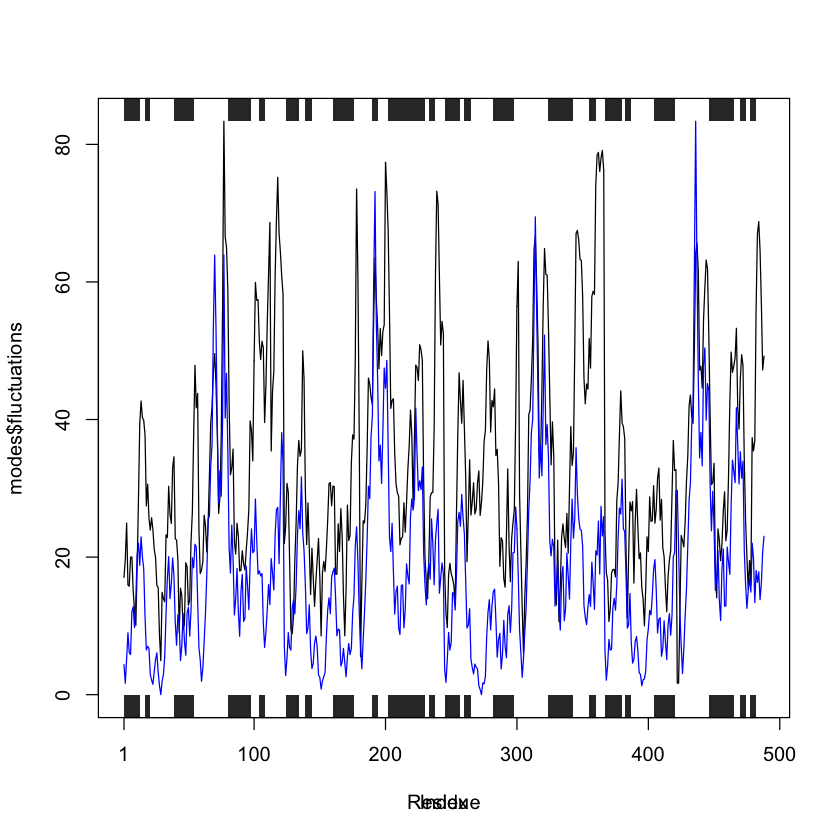

In [12]:
# Plot B-factors with NMA derived fluctuations
plot.bio3d(prot_file$atom$b[inds$atom], sse=prot_file, typ="l")
par(new=TRUE)
plot(modes$fluctuations, axes=FALSE, typ="l", col="blue")

In [13]:
## Calculate normal modes 
modes <- gnm(prot_file)
print(modes)

Warning message in gnm.pdb(prot_file):
“Possible multi-chain structure or missing in-structure residue(s) present
  Fluctuations at neighboring positions may be affected.”



Call:
  gnm.pdb(x = prot_file)

Class:
  EnergeticModes (gnm)

Number of modes:
  488 (1 trivial)

Force constants:
  Mode 2: 	0.005
  Mode 3: 	0.255
  Mode 4: 	0.262
  Mode 5: 	0.383
  Mode 6: 	0.399
  Mode 7: 	0.588

+ attr: force.constants, fluctuations, U, L, xyz, temp,
        triv.modes, natoms, call


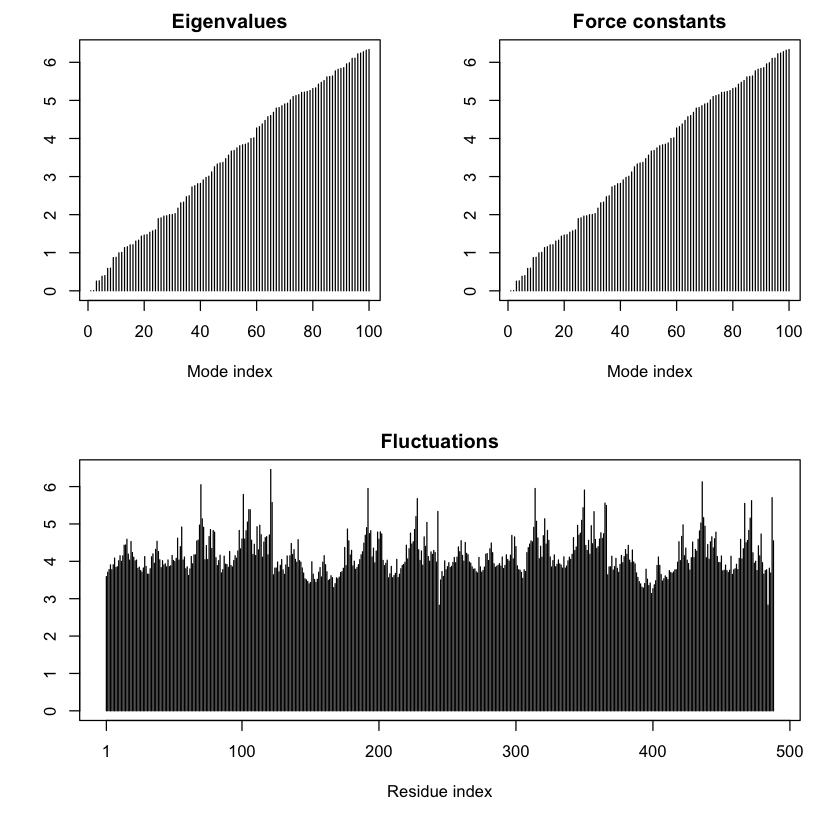

In [14]:
  ## Plot modes
plot(modes)

## 2) Visualisation de la structure

Le package "bio3d.view" pour la visualisation 3D interactive est toujours en développement. 

Mais nous pouvons supposer que les commandes seront les suivantes....

In [100]:
install.packages("bio3d.view")
library(bio3d.view) 

Warning message:
“package ‘bio3d.view’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in library(bio3d.view): there is no package called ‘bio3d.view’


In [101]:
bio3d.view(prot_file)

ERROR: Error in bio3d.view(prot_file): could not find function "bio3d.view"


REGARDER '''3D View R''' !!!!!!!!!!!!

## 3) Carte de contact

## 4) Comparer 2 séquences

Nous allons prendre comme exemple ici deux fichiers issues de la Protein Data Bank : 1UST et 1USS qui sont respectivement des domaines globulaires I et II de l'histone H1 de la levure. 

In [43]:
#library(Biostrings)

In [106]:
# yeast histone H1 globular domain I

struc1 <- read.pdb("1UST", verbose = FALSE)
seq1 <- seq_prot(struc1)
cat("La séquence protéique du fichier 1UST.pdb est :",seq1)

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmp3ZPzpk/1UST.pdb  exists. Skipping download”


La séquence protéique du fichier 1UST.pdb est : KKEEASSKSYRELIIEGLTALKERKGSSRPALKKFIKENYPIVGSASNFDLYFNNAIKKGVEAGDFEQPKGPAGAVKLAKKKSPEVKKEKEVS

In [107]:
# yeast histone H1 globular domain II

struc2 <- read.pdb("1USS", verbose = FALSE)
seq2 <- seq_prot(struc2)
cat("La séquence protéique du fichier 1USS.pdb est :", seq2)

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmp3ZPzpk/1USS.pdb  exists. Skipping download”


La séquence protéique du fichier 1USS.pdb est : KASSPSSLTYKEMILKSMPQLNDGKGSSRIVLKKYVKDTFSSKLKTSSNFDYLFNSAIKKCVENGELVQPKGPSGIIKLNKKKVKLST

### * Matrice de score Blosum62

In [18]:
# Chargement du jeu de données
data(BLOSUM62)

blosum632 = BLOSUM62
print(blosum632)

   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  J  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1 -1 -1 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1 -2  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  4 -3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4 -3  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -1 -3 -1 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0 -2  4 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1 -3  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -4 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0 -3  0 -1 -4
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3  3 -3 -1 -4
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4  3 -3 -1 -4
K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0 -3  1 -1 -4

In [108]:
alignments_global <- pairwiseAlignment(seq1, seq2, type = "global", substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
alignments_global 

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: KKEEASSKSYRELIIEGLTALKERKGSSRPALKK...GVEAGDFEQPKGPAGAVKLAKKKSPEVKKEKEVS
subject: KASSPSSLTYKEMILKSMPQLNDGKGSSRIVLKK...CVENGELVQPKGPSGIIKLNKKKV------KLST
score: 180 

In [109]:
alignments_local <- pairwiseAlignment(seq1, seq2, type = "local", substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
alignments_local

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [1] KKEEASSKSYRELIIEGLTALKERKGSSRPAL...LYFNNAIKKGVEAGDFEQPKGPAGAVKLAKKK
subject: [1] KASSPSSLTYKEMILKSMPQLNDGKGSSRIVL...YLFNSAIKKCVENGELVQPKGPSGIIKLNKKK
score: 197 

In [111]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
end_time <- Sys.time()
Tdiff <- difftime(end_time, start_time)
print(Tdiff)
########### ~~~~~~~~~~~~~~~~~~~~~###########

Time difference of 8.151504 mins
